Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/glue/sst2/incomplete.IVXBMH_2.0.0/glue-train.tfrecord*...:   0%|          …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/glue/sst2/incomplete.IVXBMH_2.0.0/glue-validation.tfrecord*...:   0%|     …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/glue/sst2/incomplete.IVXBMH_2.0.0/glue-test.tfrecord*...:   0%|          |…

Dataset glue downloaded and prepared to /root/tensorflow_datasets/glue/sst2/2.0.0. Subsequent calls will reuse this data.
Converting training data to numpy...
Training samples: 67349
Converting test data to numpy...
Test samples: 872


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 579s 339ms/step - accuracy: 0.7611 - loss: 0.4692 - val_accuracy: 0.9023 - val_loss: 0.2419 - learning_rate: 0.0010
Epoch 2/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 622s 339ms/step - accuracy: 0.9283 - loss: 0.1810 - val_accuracy: 0.9170 - val_loss: 0.2325 - learning_rate: 0.0010
Epoch 3/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 573s 340ms/step - accuracy: 0.9527 - loss: 0.1220 - val_accuracy: 0.9209 - val_loss: 0.2299 - learning_rate: 0.0010
Epoch 4/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 562s 334ms/step - accuracy: 0.9630 - loss: 0.0928 - val_accuracy: 0.9224 - val_loss: 0.2903 - learning_rate: 0.0010
Epoch 5/5
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 560s 332ms/step - accuracy: 0.9685 - loss: 0.0737 - val_accuracy: 0.9208 - val_loss: 0.3378 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 3.
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8417 - loss: 0.4372



Test Loss: 0.4360
Test Accuracy: 0.8291
Test Accuracy Percentage: 82.91%

Model and tokenizer saved successfully
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step


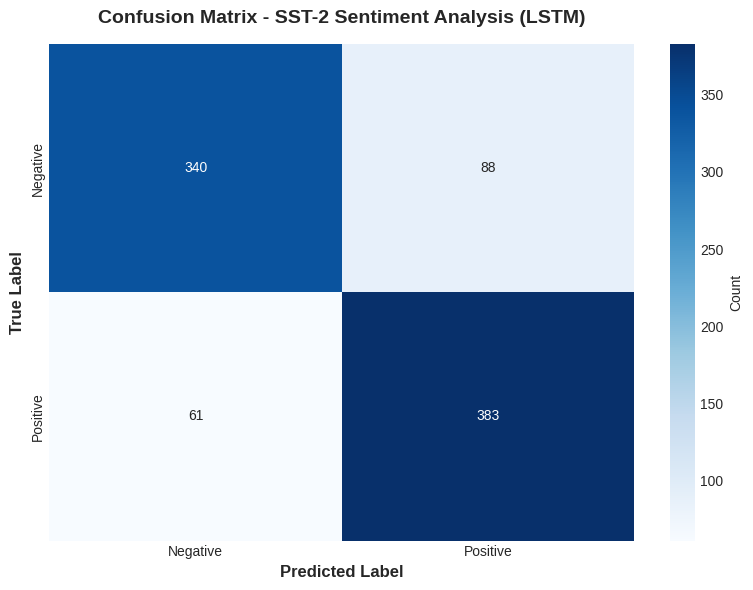


Confusion Matrix:
True Negatives: 340
False Positives: 88
False Negatives: 61
True Positives: 383

Additional Metrics:
Precision: 0.8132
Recall: 0.8626
F1-Score: 0.8372


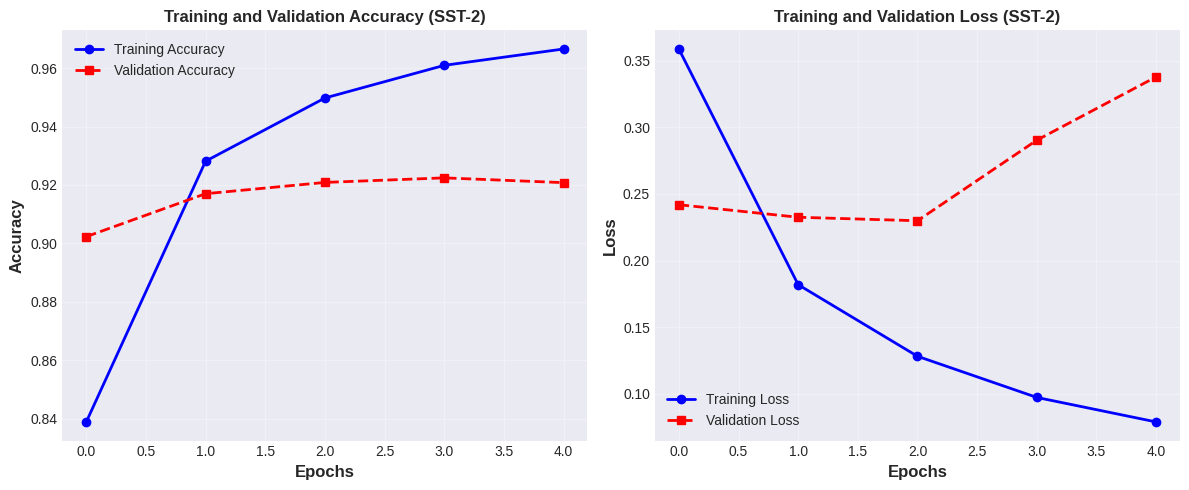

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix

# Load the GLUE SST-2 dataset (Stanford Sentiment Treebank)
raw_train_ds = tfds.load(
    'glue/sst2',
    split='train',
    as_supervised=False
)
raw_test_ds = tfds.load(
    'glue/sst2',
    split='validation',
    as_supervised=False
)

def dataset_to_numpy(ds):
    texts, labels = [], []
    for example in tfds.as_numpy(ds):
        texts.append(example['sentence'].decode('utf-8'))
        labels.append(example['label'])
    return texts, np.array(labels)

print("Converting training data to numpy...")
train_texts, y_train = dataset_to_numpy(raw_train_ds)
print(f"Training samples: {len(train_texts)}")

print("Converting test data to numpy...")
test_texts, y_test = dataset_to_numpy(raw_test_ds)
print(f"Test samples: {len(test_texts)}")

# Tokenize text data with larger vocabulary
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)

X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

# Padding sequences - SST-2 sentences are shorter
max_length = 50
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# Convert labels to float32 for training
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Define the LSTM model
model = Sequential()

# Embedding layer to convert word indices into dense vectors
embedding_dim = 256
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

# SpatialDropout1D to reduce overfitting on embeddings
model.add(SpatialDropout1D(0.2))

# Bidirectional LSTM layers (captures context from both directions)
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.3))

# Second Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=64, return_sequences=False)))
model.add(Dropout(0.3))

# Dense layer before output
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with a single neuron for binary classification
model.add(Dense(1, activation='sigmoid'))

# Summary of the model
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks for better training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Accuracy Percentage: {test_accuracy * 100:.2f}%")

# Save the model and tokenizer
model.save('sst2_sentiment_lstm_model.h5')
with open('sst2_sentiment_tokenizer.json', 'w') as f:
    f.write(tokenizer.to_json())
print("\nModel and tokenizer saved successfully")

# Get predictions for test set (probabilities)
y_pred_prob = model.predict(X_test)
y_pred_classes = (y_pred_prob > 0.5).astype(int).flatten()

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - SST-2 Sentiment Analysis (LSTM)',
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('sst2_sentiment_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nConfusion Matrix:")
print(f"True Negatives: {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives: {cm[1, 1]}")

# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 2. Training history plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-o', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(history.history['val_accuracy'], 'r--s', label='Validation Accuracy', linewidth=2, markersize=6)
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Training and Validation Accuracy (SST-2)', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-o', label='Training Loss', linewidth=2, markersize=6)
plt.plot(history.history['val_loss'], 'r--s', label='Validation Loss', linewidth=2, markersize=6)
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.title('Training and Validation Loss (SST-2)', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sst2_sentiment_training_history.png', dpi=300, bbox_inches='tight')
plt.show()